# Plotting the saved np.array

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


# Chang Cooper Data Files

# data_filename = "data_array_20251208_110708.npz" # D0 = 0.01
# data_filename = "data_array_20251207_212224.npz" # D0 = 0.00001 going up and down
# data_filename = "data_array_20251208_131328.npz" # nice one D0 = 0.00001

# data_filename ="data_array_20251208_232915.npz" # D0 = 0.01 longer time

data_filename ="data_array_20251210_150834.npz" # D0 = 0.00001 shorter time

# Crank Nicolson Data Files
# data_filename ="D0=0.01_t=3000_x=280_z=-20_z0=-2.npz" # D0 = 0.01 longer time
# data_filename = "D0=1e-05_t=1000_x=100_z=-5_z0=-2.npz" # D0 = 0.00001 shorter time

try:
    with np.load(data_filename) as data:
        sol_data = data['solution']
        t_sub = data['time']
        x_grid = data['x_grid']
        z_grid = data['z_grid']
        phi_grid = data['phi_grid'] 
        
    print(f"All data loaded successfully from {data_filename}.")
    print(f"Solution shape: {sol_data.shape}")
    

except FileNotFoundError:
    print(f"Error: The file **{data_filename}** was not found.")

All data loaded successfully from data_array_20251210_150834.npz.
Solution shape: (101, 150, 80, 50)


## Calculating the Marginals

In [ ]:
def get_expected_path(solution, t_saved, x_grid, z_grid, phi_grid):
    """
    Calculates the center of mass <x>(t), <z>(t), and <phi>(t) 
    from the Fokker-Planck probability density evolution.
    
    Parameters
    ----------
    solution : ndarray (Nt, Nx, Nz, Nphi)
        The subsampled output from the FP solver.
    t_saved : ndarray (Nt)
        The time steps corresponding to the solution frames.
    x_grid, z_grid, phi_grid : ndarray
        The 1D grids for space and phi.
        
    Returns
    -------
    mu_x : ndarray
        Expected x position over time.
    mu_z : ndarray
        Expected z position over time.
    mu_phi : ndarray
        Expected phi value over time.
    """
    Nt = len(t_saved)
    mu_x = np.zeros(Nt)
    mu_z = np.zeros(Nt)
    mu_phi = np.zeros(Nt)
    
    print(f"Extracting expected paths from {Nt} frames...")
    
    for n in range(Nt):
        f_t = solution[n] # Shape: (Nx, Nz, Nphi)
        
        # 1. Marginalize to get 1D distributions
        
        # Sum over axes (1, 2) -> (z, phi) to get P(x)
        p_x = np.sum(f_t, axis=(1, 2)) 
        
        # Sum over axes (0, 2) -> (x, phi) to get P(z)
        p_z = np.sum(f_t, axis=(0, 2))

        # Sum over axes (0, 1) -> (x, z) to get P(phi)
        p_phi = np.sum(f_t, axis=(0, 1))
        
        # 2. Calculate Center of Mass (Expectation Value)
        total_prob = np.sum(p_x)
        
        if total_prob > 1e-9:
            mu_x[n] = np.sum(x_grid * p_x) / total_prob
            mu_z[n] = np.sum(z_grid * p_z) / total_prob
            mu_phi[n] = np.sum(phi_grid * p_phi) / total_prob
        else:
            # Handle empty/finished simulation or numerical underflow
            mu_x[n] = mu_x[n-1] if n > 0 else x_grid[0]
            mu_z[n] = mu_z[n-1] if n > 0 else z_grid[0]
            mu_phi[n] = mu_phi[n-1] if n > 0 else phi_grid[0]
            
    return mu_x, mu_z, mu_phi

mean_x, mean_z, mean_phi = get_expected_path(sol_data, t_sub, x_grid, z_grid, phi_grid)

Extracting expected paths from 101 frames...


### Seperate Plots

Saved: ./Average Plots/time_vs_depth_2.jpg


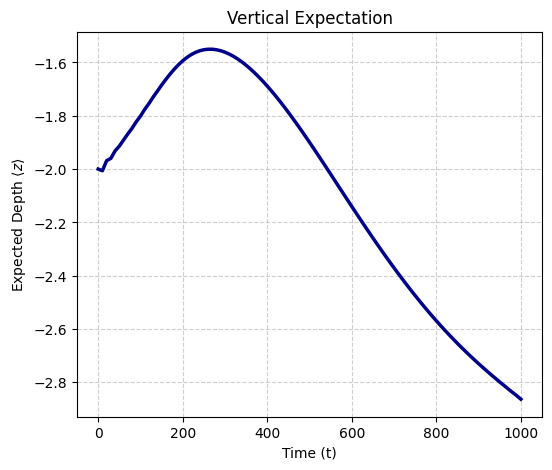

Saved: ./Average Plots/time_vs_horizontal_2.jpg


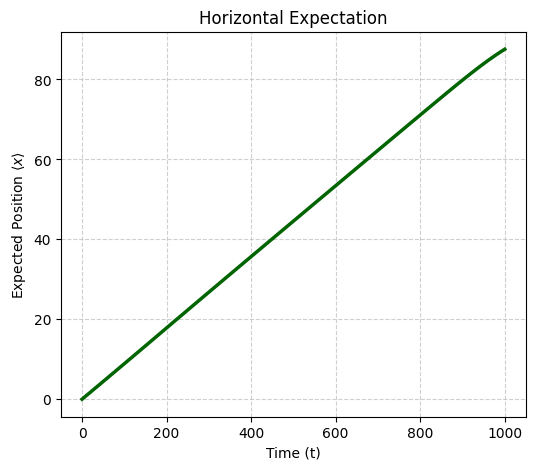

Saved: ./Average Plots/time_vs_phi_2.jpg


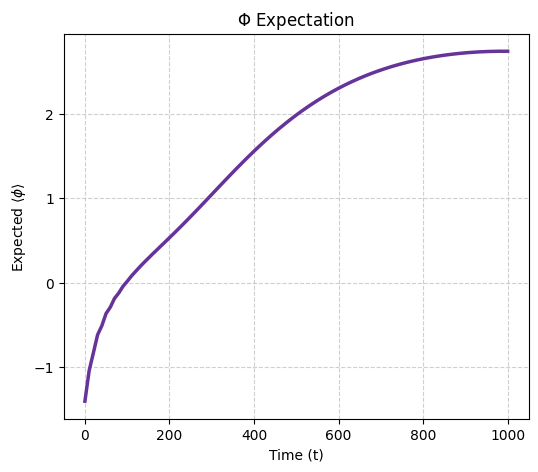

Saved: ./Average Plots/parametric_space_zx_2.jpg


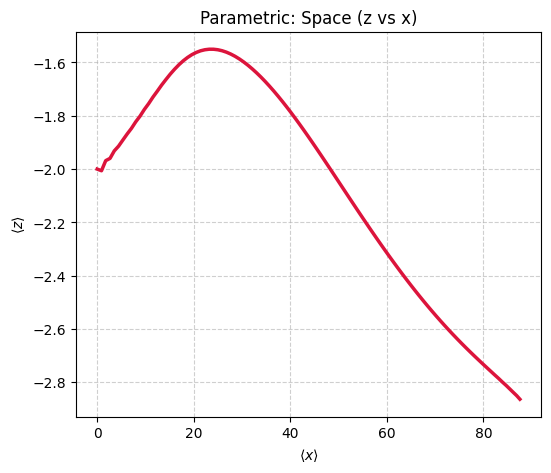

Saved: ./Average Plots/parametric_phi_x_2.jpg


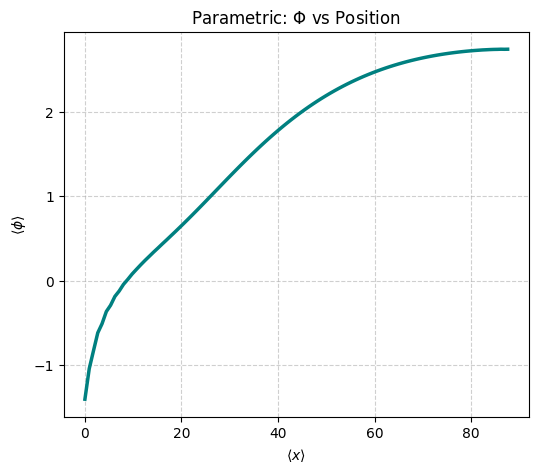

Saved: ./Average Plots/parametric_phi_z_2.jpg


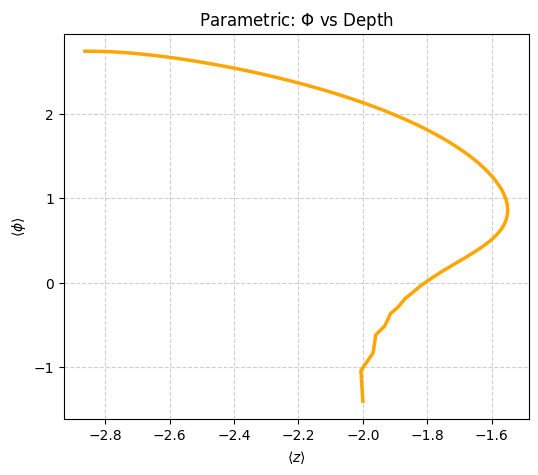

Saved: ./Average Plots/combined_time_series_2.jpg


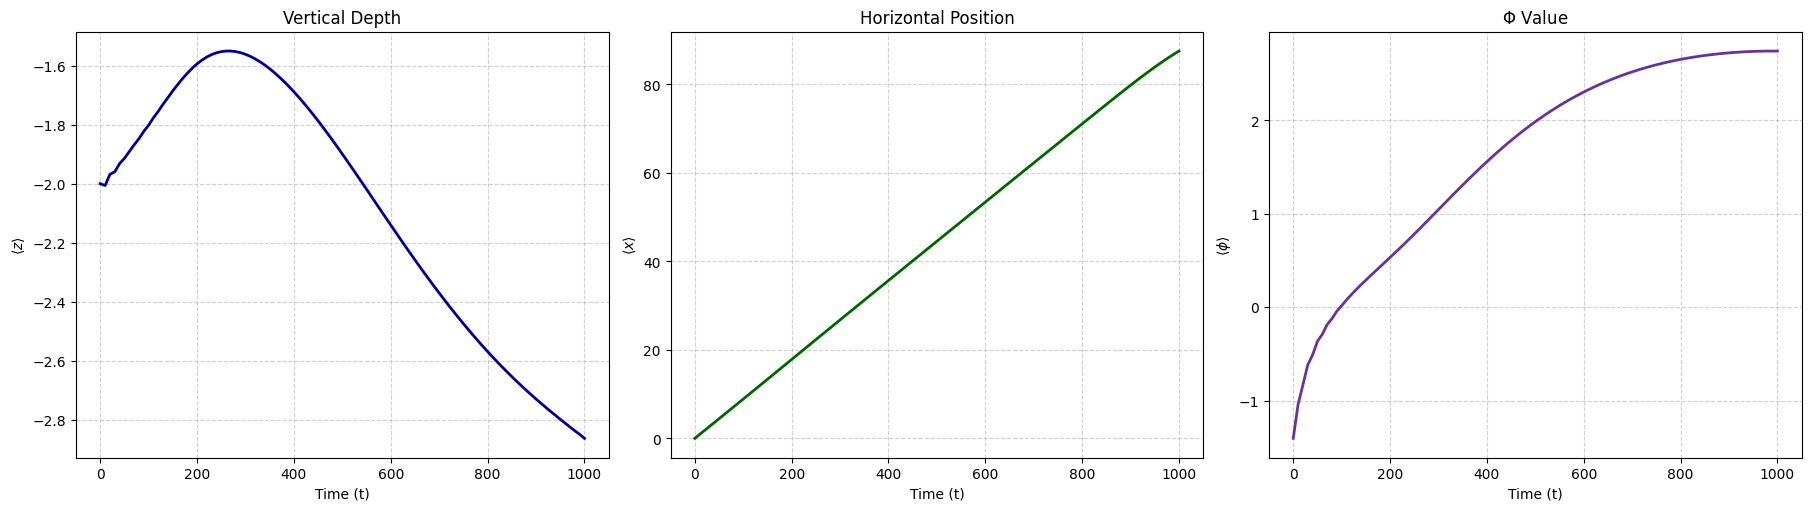

Saved: ./Average Plots/combined_parametric_2.jpg


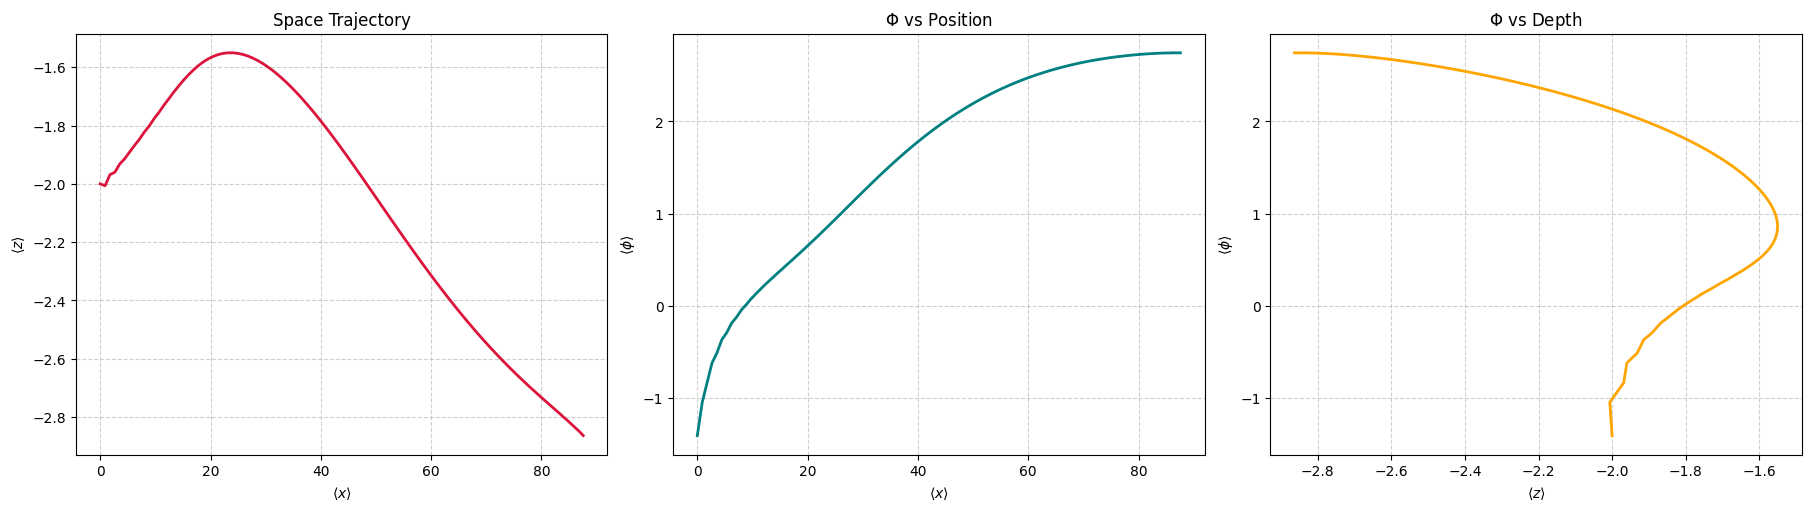

Interactive plot saved to: ./Average Plots/clean_3d_trajectory_2.html


In [ ]:
file_type = 'jpg'
timestamp = 2


# 0. Setup Directory
save_dir = "./Average Plots"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Created directory: {save_dir}")

# ==========================================
# PART 1: TIME SERIES PLOTS (Variables vs Time)
# ==========================================

# 1. Vertical Depth vs Time
plt.figure(figsize=(6, 5))
plt.plot(t_sub, mean_z, color='darkblue', linewidth=2.5)
plt.xlabel('Time (t)')
plt.ylabel(r'Expected Depth $\langle z \rangle$')
plt.title('Vertical Expectation')
plt.grid(True, linestyle='--', alpha=0.6)
save_path = os.path.join(save_dir, f"time_vs_depth_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

# 2. Horizontal Position vs Time
plt.figure(figsize=(6, 5))
plt.plot(t_sub, mean_x, color='darkgreen', linewidth=2.5)
plt.xlabel('Time (t)')
plt.ylabel(r'Expected Position $\langle x \rangle$')
plt.title('Horizontal Expectation')
plt.grid(True, linestyle='--', alpha=0.6)
save_path = os.path.join(save_dir, f"time_vs_horizontal_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

# 3. Phi vs Time
plt.figure(figsize=(6, 5))
plt.plot(t_sub, mean_phi, color='rebeccapurple', linewidth=2.5)
plt.xlabel('Time (t)')
plt.ylabel(r'Expected $\langle \phi \rangle$')
plt.title(r'$\Phi$ Expectation')
plt.grid(True, linestyle='--', alpha=0.6)
save_path = os.path.join(save_dir, f"time_vs_phi_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()


# ==========================================
# PART 2: PARAMETRIC TRAJECTORIES (Variables vs Variables)
# ==========================================

# 4. Space Trajectory (Z vs X)
plt.figure(figsize=(6, 5))
plt.plot(mean_x, mean_z, color='crimson', linewidth=2.5)
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$\langle z \rangle$')
plt.title('Parametric: Space (z vs x)')
plt.grid(True, linestyle='--', alpha=0.6)

save_path = os.path.join(save_dir, f"parametric_space_zx_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

# 5. Phi vs Horizontal (Phi vs X)
plt.figure(figsize=(6, 5))
plt.plot(mean_x, mean_phi, color='teal', linewidth=2.5)
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$\langle \phi \rangle$')
plt.title(r'Parametric: $\Phi$ vs Position')
plt.grid(True, linestyle='--', alpha=0.6)
save_path = os.path.join(save_dir, f"parametric_phi_x_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

# 6. Phi vs Vertical (Phi vs Z)
plt.figure(figsize=(6, 5))
plt.plot(mean_z, mean_phi, color='orange', linewidth=2.5)
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$\langle \phi \rangle$')
plt.title(r'Parametric: $\Phi$ vs Depth')
plt.grid(True, linestyle='--', alpha=0.6)
save_path = os.path.join(save_dir, f"parametric_phi_z_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()


# ==========================================
# PART 3: COMBINED ROW PLOTS
# ==========================================

# --- Combined A: All Time Series (1 Row, 3 Cols) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Depth vs Time
axes[0].plot(t_sub, mean_z, color='darkblue', linewidth=2)
axes[0].set_xlabel('Time (t)')
axes[0].set_ylabel(r'$\langle z \rangle$')
axes[0].set_title('Vertical Depth')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Position vs Time
axes[1].plot(t_sub, mean_x, color='darkgreen', linewidth=2)
axes[1].set_xlabel('Time (t)')
axes[1].set_ylabel(r'$\langle x \rangle$')
axes[1].set_title('Horizontal Position')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Phi vs Time
axes[2].plot(t_sub, mean_phi, color='rebeccapurple', linewidth=2)
axes[2].set_xlabel('Time (t)')
axes[2].set_ylabel(r'$\langle \phi \rangle$')
axes[2].set_title(r'$\Phi$ Value')
axes[2].grid(True, linestyle='--', alpha=0.6)

save_path = os.path.join(save_dir, f"combined_time_series_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150)
print(f"Saved: {save_path}")
plt.show()

# --- Combined B: All Parametric (1 Row, 3 Cols) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Space (Z vs X)
axes[0].plot(mean_x, mean_z, color='crimson', linewidth=2)
axes[0].set_xlabel(r'$\langle x \rangle$')
axes[0].set_ylabel(r'$\langle z \rangle$')
axes[0].set_title('Space Trajectory')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Phase vs Space (Phi vs X)
axes[1].plot(mean_x, mean_phi, color='teal', linewidth=2)
axes[1].set_xlabel(r'$\langle x \rangle$')
axes[1].set_ylabel(r'$\langle \phi \rangle$')
axes[1].set_title(r'$\Phi$ vs Position')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Phase vs Depth (Phi vs Z)
axes[2].plot(mean_z, mean_phi, color='orange', linewidth=2)
axes[2].set_xlabel(r'$\langle z \rangle$')
axes[2].set_ylabel(r'$\langle \phi \rangle$')
axes[2].set_title(r'$\Phi$ vs Depth')
axes[2].grid(True, linestyle='--', alpha=0.6)

save_path = os.path.join(save_dir, f"combined_parametric_{timestamp}.{file_type}")
plt.savefig(save_path, dpi=150)
print(f"Saved: {save_path}")
plt.show()

fig.show()